In [2]:
import json

input_file = "homepage_data_analyzed_multiple_joined_15.json"
data = json.load(open(input_file, "r"))


In [3]:
import matplotlib.pyplot as plt
import numpy as np

people = data["general_analysis_gpt-4o_0_0"].keys()
people

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [4]:
hong_kong_emphasis_scores_columns = [key for key in data.keys() if key.startswith("hong_kong_emphasis_score")]
for column in hong_kong_emphasis_scores_columns:
    scores = data[column]
    inverse_scores = {}
    for person in scores:
        inverse_scores[person] = 10 - scores[person] if scores[person] else None
    data["inverse_" + column] = inverse_scores

In [5]:
data.keys()

dict_keys(['general_analysis_gpt-4o_0_0', 'cross_group_thinking_ideas_analysis_gpt-4o_0_0', 'cross_group_thinking_score_gpt-4o_0_0', 'unifying_language_ideas_analysis_gpt-4o_0_0', 'unifying_language_score_gpt-4o_0_0', 'shared_initiatives_outreach_ideas_analysis_gpt-4o_0_0', 'shared_initiatives_outreach_score_gpt-4o_0_0', 'importance_of_career_standing_ideas_analysis_gpt-4o_0_0', 'importance_of_career_standing_score_gpt-4o_0_0', 'hong_kong_emphasis_ideas_analysis_gpt-4o_0_0', 'hong_kong_emphasis_score_gpt-4o_0_0', 'highlighting_china_organization_ideas_analysis_gpt-4o_0_0', 'highlighting_china_organization_score_gpt-4o_0_0', 'general_analysis_gpt-4o_1_0', 'cross_group_thinking_ideas_analysis_gpt-4o_1_0', 'cross_group_thinking_score_gpt-4o_1_0', 'unifying_language_ideas_analysis_gpt-4o_1_0', 'unifying_language_score_gpt-4o_1_0', 'shared_initiatives_outreach_ideas_analysis_gpt-4o_1_0', 'shared_initiatives_outreach_score_gpt-4o_1_0', 'importance_of_career_standing_ideas_analysis_gpt-4o_1_0

In [11]:
possible_endings = list(set([text.split("gpt-4o")[-1] for text in data.keys() if "gpt-4o" in text]))
print(possible_endings, len(possible_endings))

['_0_1', '_2_1', '_5_2', '_3_2', '_1_1', '_0_2', '_2_0', '_4_1', '_1_0', '_1_2', '_4_2', '_2_2', '_0_0', '_3_1', '_3_0'] 15


In [12]:
score_columns = {
    "camouflage": ['importance_of_career_standing_score', 'inverse_hong_kong_emphasis_score', 'highlighting_china_organization_score'],
    "reconciliation": ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score']
}

In [20]:
all_score_columns = {}
for major_key in ["camouflage", "reconciliation"]:
    for ending in possible_endings:
        all_score_columns[major_key + "-" + ending] = []

for key in all_score_columns.keys():
    major_key = key.split("-")[0]
    ending = key.split("-")[1]
    for column in score_columns[major_key]:
        for real_column in data.keys():
            if real_column.startswith(column) and real_column.endswith(ending):
                all_score_columns[key].append(real_column)

In [21]:
all_score_columns

{'camouflage-_0_1': ['importance_of_career_standing_score_gpt-4o_0_1',
  'inverse_hong_kong_emphasis_score_gpt-4o_0_1',
  'highlighting_china_organization_score_gpt-4o_0_1'],
 'camouflage-_2_1': ['importance_of_career_standing_score_gpt-4o_2_1',
  'inverse_hong_kong_emphasis_score_gpt-4o_2_1',
  'highlighting_china_organization_score_gpt-4o_2_1'],
 'camouflage-_5_2': ['importance_of_career_standing_score_gpt-4o_5_2',
  'inverse_hong_kong_emphasis_score_gpt-4o_5_2',
  'highlighting_china_organization_score_gpt-4o_5_2'],
 'camouflage-_3_2': ['importance_of_career_standing_score_gpt-4o_3_2',
  'inverse_hong_kong_emphasis_score_gpt-4o_3_2',
  'highlighting_china_organization_score_gpt-4o_3_2'],
 'camouflage-_1_1': ['importance_of_career_standing_score_gpt-4o_1_1',
  'inverse_hong_kong_emphasis_score_gpt-4o_1_1',
  'highlighting_china_organization_score_gpt-4o_1_1'],
 'camouflage-_0_2': ['importance_of_career_standing_score_gpt-4o_0_2',
  'inverse_hong_kong_emphasis_score_gpt-4o_0_2',
  'hi

In [24]:
import pandas as pd
author_stats = pd.DataFrame(index=people)
for category in all_score_columns:
    for column in all_score_columns[category]:
        scores_series = pd.Series(data[column])
        author_stats[column] = scores_series

In [25]:
for category in all_score_columns:
    author_stats[category] = np.mean(author_stats[all_score_columns[category]], axis=1)

/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_96603/1722686219.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  author_stats[category] = np.mean(author_stats[all_score_columns[category]], axis=1)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_96603/1722686219.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  author_stats[category] = np.mean(author_stats[all_score_columns[category]], axis=1)
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_96603/1722686219.py:2: PerformanceWarning: DataFram

In [26]:
camouflage_stats = []
reconciliation_stats = []

for column in author_stats:
    if column.startswith("camouflage"):
        camouflage_stats.extend(author_stats[column].tolist())
    elif column.startswith("reconciliation"):
        reconciliation_stats.extend(author_stats[column].tolist())

In [28]:
df = pd.DataFrame({"all_camouflage_scores": camouflage_stats,
                   "all_reconciliation_scores": reconciliation_stats})
df = df.dropna()
df

,all_camouflage_scores,all_reconciliation_scores
0,6.000000,5.666667
1,5.666667,6.000000
2,5.000000,2.333333
3,6.000000,2.333333
4,6.000000,2.000000
...,...,...
2455,6.666667,4.000000
2456,7.000000,3.000000
2457,7.333333,3.333333
2458,6.333333,3.000000


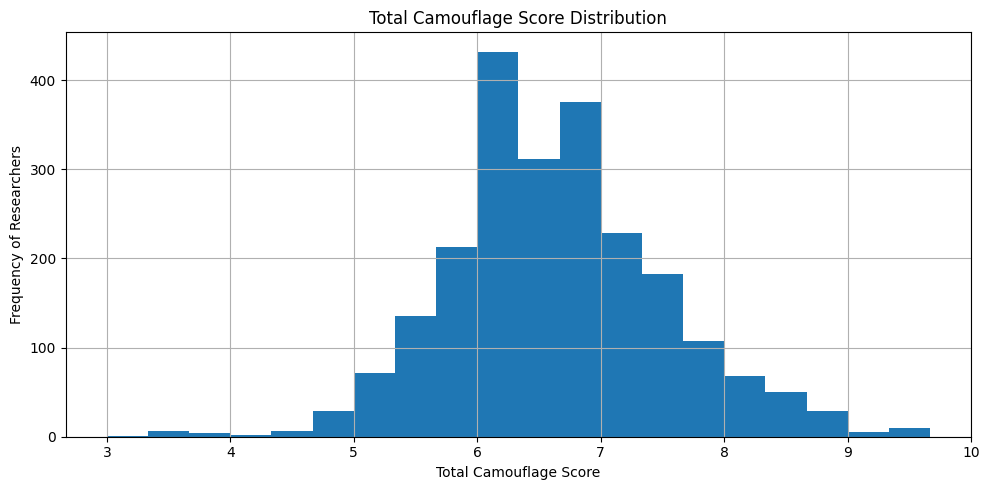

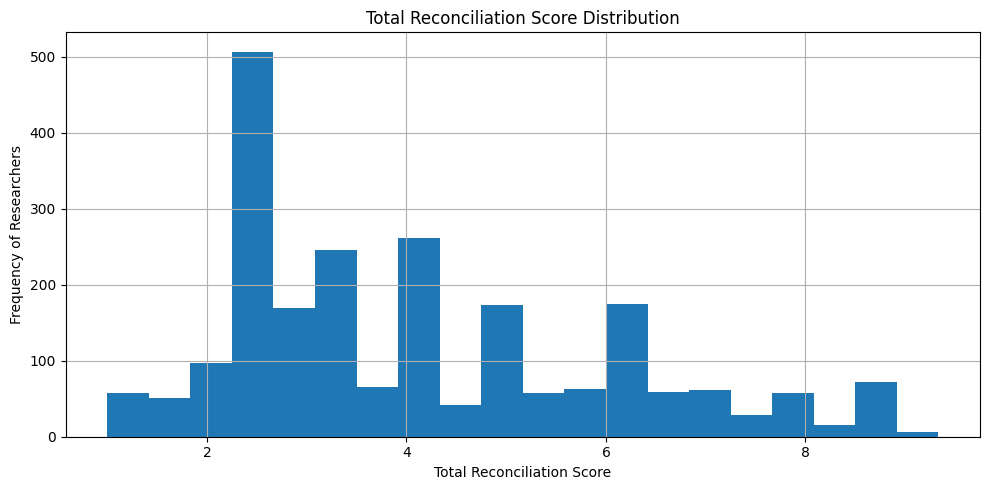

In [30]:
import matplotlib.pyplot as plt

# Plot the Total Camouflage Score Distribution
plt.figure(figsize=(10, 5))
plt.title("Total Camouflage Score Distribution")
plt.xlabel("Total Camouflage Score")
plt.ylabel("Frequency of Researchers")
df["all_camouflage_scores"][df["all_camouflage_scores"] > 0].hist(bins=20)
plt.tight_layout()  # Adjust layout after adding title and labels
plt.show()

# Plot the Total Reconciliation Score Distribution
plt.figure(figsize=(10, 5))
plt.title("Total Reconciliation Score Distribution")
plt.xlabel("Total Reconciliation Score")
plt.ylabel("Frequency of Researchers")
df["all_reconciliation_scores"][df["all_reconciliation_scores"] > 0].hist(bins=20)
plt.tight_layout()  # Adjust layout after adding title and labels
plt.show()

In [ ]:
run_data = {}
